In [1]:
import gym 
gym.version.VERSION

'0.10.3'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv

In [3]:
env = GridworldEnv(1) # Number of plan 

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


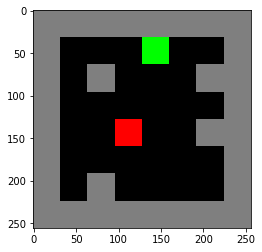

In [4]:
env.render()

In [5]:
print(env.reset())
print(env.action_space.sample())
env.step(env.action_space.sample())

[[1 1 1 1 1 1 1 1]
 [1 0 0 0 3 0 0 1]
 [1 0 1 0 0 0 1 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 4 0 0 1 1]
 [1 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]
4


(array([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 3, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 4, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]]), -0.1, False, {'success': True})

In [6]:
env.verbose = True
print( env._get_agent_start_target_state())

((4, 3), (1, 4))


In [7]:
env.grid_map_shape

(8, 8)

In [8]:
env.observation_space

Box(8, 8)

In [9]:
env.action_space

Discrete(5)

-0.1
-0.1
-0.6
-0.1
0.9


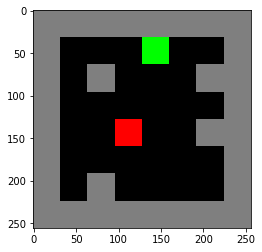

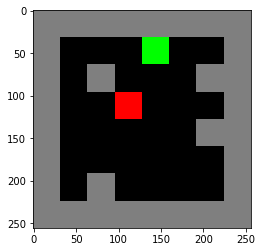

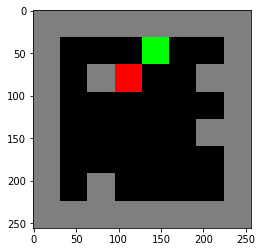

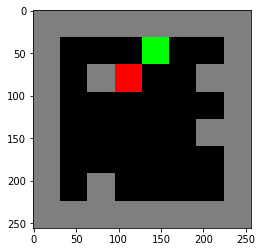

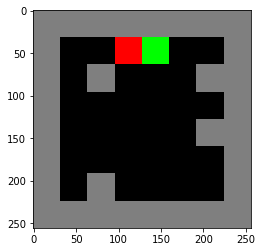

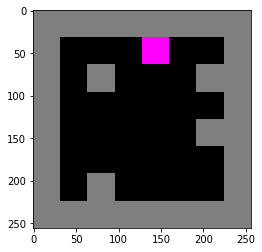

In [10]:
# Try random policy 
env.reset()
moves = [2,2,3,2,4]
env.render()
for i in range(len(moves)):
    move = env.action_space.sample()
    _, reward, _, _ =  env.step(moves[i]) 
    print(reward)
    env.render()